In [1]:
import pandas as pd

train_data = pd.read_csv("dataset_train.csv", index_col = "ID")
test_data = pd.read_csv("dataset_eval.csv", index_col = "ID")

# drop identification data
dropped_columns = ["Customer_ID", "Name", "SSN"]
train_data.drop(dropped_columns, axis = 1, inplace = True)
test_data.drop(dropped_columns, axis = 1, inplace = True)
# make categories 0, 1, 2
y = train_data.pop("Credit_Score") + 1

train_data.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
ID,,,,,,,,,,,,,,,,,,,,,
0x6762,January,25,Accountant,62214.36,4997.530000,9,7,19,9,"Credit-Builder Loan, Student Loan, Mortgage Lo...",...,8.0,_,2892.91,31.737712,13 Years and 10 Months,Yes,339.971582,216.583807190171,High_spent_Small_value_payments,203.19761100877272
0x18b64,July,33,_______,14613.65,1334.804167,8,583,22,6,"Personal Loan, Credit-Builder Loan, Personal L...",...,9.0,Bad,2882.07,27.414562,2 Years and 3 Months,Yes,67.975819,57.54453501725725,High_spent_Small_value_payments,267.96006258969163
0xb8d5,August,56,Lawyer,101112.6,8600.050000,8,6,4,2,"Auto Loan, and Mortgage Loan",...,2.0,Good,399.49,36.516160,29 Years and 3 Months,No,143.856735,132.07082261639974,High_spent_Large_value_payments,824.0774428659337
0x2ec3,February,50,Journalist,140390.32,11888.193333,5,2,4,3,"Credit-Builder Loan, Home Equity Loan, and Pay...",...,2.0,Good,1423.23,36.955252,30 Years and 9 Months,No,182.160424,133.2130344228415,High_spent_Medium_value_payments,1123.4458751336915
0x1b36,January,24,Musician,20188.02,1851.335000,4,3,6,3,"Mortgage Loan, Student Loan, and Mortgage Loan",...,0.0,_,399.92,28.542585,20 Years and 2 Months,No,25.580281,147.63621347336863,Low_spent_Large_value_payments,281.91700571081503


In [2]:
clean_train_data = train_data.copy()
clean_test_data = test_data.copy()

# some columns have formatting problems, such as values ending in _, we can replace those with an average value, a value outside the normal range etc.
fix_column_formatting = ["Age", "Annual_Income", "Num_of_Loan", "Num_of_Delayed_Payment", "Changed_Credit_Limit", "Outstanding_Debt", "Amount_invested_monthly", "Monthly_Balance"]
mean_column_values = {"Age": 31.0, "Annual_Income": 33755.0, "Num_of_Loan": 3.0, "Num_of_Delayed_Payment": 14.0, "Changed_Credit_Limit": 9.55, "Outstanding_Debt": 1231.0, "Amount_invested_monthly": 118.28, "Monthly_Balance": 324.88}

def data_to_float_generator(column_name):
    mean_value = mean_column_values[column_name]
    def data_to_float(data):
        float_data = 0
        try:
            float_data = float(data)
        # if can't convert to float, return the mean value instead
        except ValueError:
            return mean_value
        # values shouldn't be negative
        if float_data < 0:
            return mean_value
        return float_data
    return data_to_float

for column in fix_column_formatting:
    data_to_float = data_to_float_generator(column)
    clean_train_data[column] = train_data[column].map(data_to_float)
    clean_test_data[column] = test_data[column].map(data_to_float)
    
print(clean_train_data.columns)

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')


In [3]:
from sklearn.preprocessing import LabelEncoder


# the payment_behaviour column is made of 2-part descriptions
def split_payment_behaviour(df):
    df["Payment_Behaviour_1"] = df["Payment_Behaviour"].str[:10]
    df["Payment_Behaviour_2"] = df["Payment_Behaviour"].str[-21:]

split_payment_behaviour(clean_train_data)
split_payment_behaviour(clean_test_data)


# categorical encoding for columns with small number of unique values
LabelEncoder = LabelEncoder()
label_columns = ["Month", "Occupation", "Credit_Mix", "Payment_of_Min_Amount", "Payment_Behaviour_1", "Payment_Behaviour_2"]

for column in label_columns:
    print(clean_train_data[column].value_counts())
    
    LabelEncoder.fit(clean_train_data[column])
    clean_train_data[column] = LabelEncoder.transform(clean_train_data[column])
    clean_test_data[column] = LabelEncoder.transform(clean_test_data[column])
    
print(clean_train_data.nunique())
clean_train_data.info()

Month
January     5622
April       5543
August      5529
June        5526
May         5524
July        5523
February    5499
March       5441
Name: count, dtype: int64
Occupation
_______          3086
Lawyer           2971
Mechanic         2831
Engineer         2788
Doctor           2781
Developer        2779
Media_Manager    2775
Teacher          2775
Accountant       2743
Entrepreneur     2741
Scientist        2729
Architect        2724
Musician         2667
Writer           2635
Manager          2599
Journalist       2583
Name: count, dtype: int64
Credit_Mix
Standard    16225
Good         9564
Bad          9454
_            8964
Name: count, dtype: int64
Payment_of_Min_Amount
Yes    24807
No     14092
NM      5308
Name: count, dtype: int64
Payment_Behaviour_1
Low_spent_    22020
High_spent    18926
!@9#%8         3261
Name: count, dtype: int64
Payment_Behaviour_2
_Small_value_payments    16449
Medium_value_payments    13914
_Large_value_payments    10583
!@9#%8                    32

In [4]:
"""other possible modifications:
type_of_loan
"""
print(clean_train_data["Credit_History_Age"])

def credit_history_age_in_months(df):
    df["Credit_History_Age_in_Months"] = (12 * df["Credit_History_Age"].str.split(' ').str[0].map(int) 
                                          + df["Credit_History_Age"].str.split(' ').str[3].map(int) )

credit_history_age_in_months(clean_train_data)
credit_history_age_in_months(clean_test_data)

clean_train_data["Credit_History_Age_in_Months"]
print(clean_train_data["Credit_History_Age_in_Months"])

ID
0x6762     13 Years and 10 Months
0x18b64      2 Years and 3 Months
0xb8d5      29 Years and 3 Months
0x2ec3      30 Years and 9 Months
0x1b36      20 Years and 2 Months
                    ...          
0x156b4     29 Years and 7 Months
0x4f29     19 Years and 10 Months
0x18d58     12 Years and 0 Months
0x3441     10 Years and 11 Months
0xde07      31 Years and 9 Months
Name: Credit_History_Age, Length: 44207, dtype: object
ID
0x6762     166
0x18b64     27
0xb8d5     351
0x2ec3     369
0x1b36     242
          ... 
0x156b4    355
0x4f29     238
0x18d58    144
0x3441     131
0xde07     381
Name: Credit_History_Age_in_Months, Length: 44207, dtype: int64


In [5]:
# we'll train the model using only the numerical data
# the rest of the columns will be dropped for now
numeric_types = ["int64", "float64"]
numeric_clean_train_data = clean_train_data.select_dtypes(numeric_types)
numeric_clean_test_data = clean_test_data.select_dtypes(numeric_types)
numeric_clean_train_data

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Payment_Behaviour_1,Payment_Behaviour_2,Credit_History_Age_in_Months
ID,,,,,,,,,,,,,,,,,,,,,
0x6762,3,25.0,0,62214.360,4997.530000,9,7,19,9.0,58,...,3,2892.91,31.737712,2,339.971582,216.583807,203.197611,1,3,166
0x18b64,4,33.0,15,14613.650,1334.804167,8,583,22,6.0,20,...,0,2882.07,27.414562,2,67.975819,57.544535,267.960063,1,3,27
0xb8d5,1,56.0,7,101112.600,8600.050000,8,6,4,2.0,18,...,1,399.49,36.516160,1,143.856735,132.070823,824.077443,1,2,351
0x2ec3,2,50.0,6,140390.320,11888.193333,5,2,4,3.0,3,...,1,1423.23,36.955252,1,182.160424,133.213034,1123.445875,1,1,369
0x1b36,3,24.0,11,20188.020,1851.335000,4,3,6,3.0,10,...,3,399.92,28.542585,1,25.580281,147.636213,281.917006,2,2,242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x156b4,4,40.0,12,15366.215,996.517917,4,4,15,1.0,24,...,2,189.59,33.137150,1,9.091012,73.956789,306.603990,2,3,355
0x4f29,0,19.0,3,72125.200,6094.433333,3,5,12,2.0,7,...,3,95.23,25.693600,2,84.489296,118.280000,689.547885,1,2,238
0x18d58,6,32.0,14,20723.800,1611.983333,7,9,23,6.0,60,...,0,4394.08,29.059281,0,95.605958,196.992752,158.599623,2,3,144


<Axes: xlabel='Annual_Income', ylabel='Monthly_Inhand_Salary'>

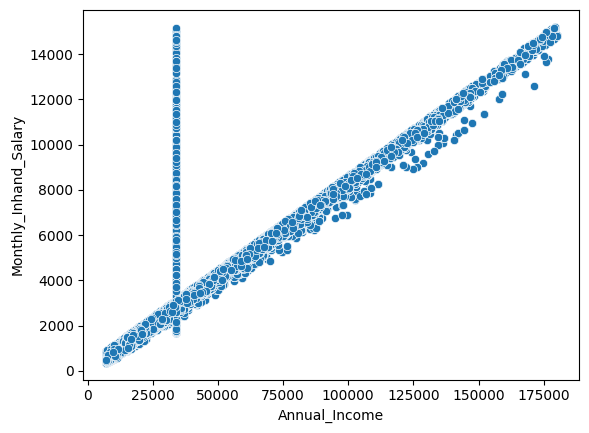

In [6]:
import seaborn as sns

df = numeric_clean_train_data
# for ~99% of customers the annual income is about 12x their monthly inhand salary
t_train_data = df[df["Annual_Income"] / df["Monthly_Inhand_Salary"] < 20]
sns.scatterplot(y = t_train_data["Monthly_Inhand_Salary"], x = t_train_data["Annual_Income"])

<Axes: xlabel='Annual_Income', ylabel='Monthly_Inhand_Salary'>

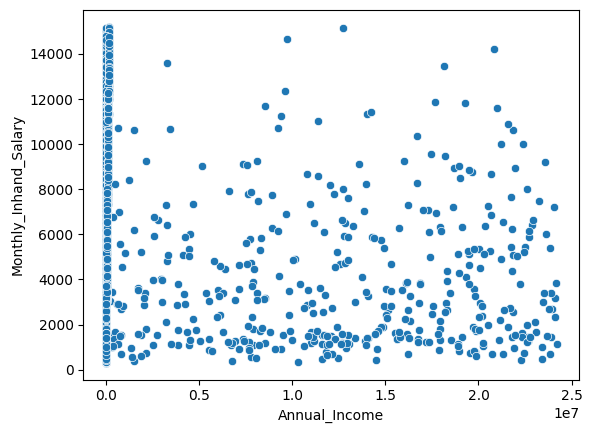

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# the top 1% earners might have additional income from other sources
# it's possible to drop either monthly_inhand_salary or annual_income and 
# replace it with a column representing the annual_income to monthly_inhand_salary income
sns.scatterplot(y = numeric_clean_train_data["Monthly_Inhand_Salary"], x = numeric_clean_train_data["Annual_Income"])

In [8]:
from sklearn.feature_selection import mutual_info_regression

mi = mutual_info_regression(numeric_clean_train_data, numeric_clean_train_data["Monthly_Inhand_Salary"])
mi = pd.Series(mi, index = numeric_clean_train_data.columns)
mi.sort_values(ascending = False)

# monthly_inhand_salary seems to correlate strongly with other columns
# dropping some of them could be a way to reduce dimensionality

Monthly_Inhand_Salary           9.158955
Outstanding_Debt                6.788310
Total_EMI_per_month             6.580837
Annual_Income                   6.539996
Changed_Credit_Limit            3.469494
Interest_Rate                   2.543217
Occupation                      1.784185
Age                             1.761712
Num_Bank_Accounts               1.701104
Delay_from_due_date             1.542110
Num_Credit_Card                 1.502618
Num_Credit_Inquiries            1.396762
Num_of_Loan                     1.308448
Num_of_Delayed_Payment          0.931283
Monthly_Balance                 0.588658
Credit_Mix                      0.582667
Payment_of_Min_Amount           0.417928
Amount_invested_monthly         0.368081
Credit_History_Age_in_Months    0.218170
Payment_Behaviour_1             0.059785
Payment_Behaviour_2             0.051274
Credit_Utilization_Ratio        0.027583
Month                           0.000000
dtype: float64

In [9]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

model = XGBClassifier(seed = 0, n_estimators = 200, learning_rate = 0.3, max_depth = 15)
scores = cross_val_score(model, numeric_clean_train_data, y, cv = 5, scoring = 'accuracy')
print(scores.mean())

0.7630919958908113


In [13]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(random_state = 0, verbose = -1, n_estimators = 500, learning_rate = 0.15, num_leaves = 100, max_depth = 15, min_child_samples = 10)
scores = cross_val_score(model, numeric_clean_train_data, y, cv = 5, scoring = 'accuracy')
print(scores.mean())

0.7652408744897574


In [11]:
model = LGBMClassifier(random_state = 0, verbose = -1, n_estimators = 500, learning_rate = 0.15, num_leaves = 100, max_depth = 15, min_child_samples = 10)
model.fit(numeric_clean_train_data, y)
res = model.predict(numeric_clean_test_data)

In [12]:
output = pd.DataFrame(res)
output.index = test_data.index
# changing categories back 0, 1, 2 -> -1, 0, 1
output = output - 1
output.rename({0: "Credit_Score"}, axis = "columns", inplace = True)
output.to_csv("output_2.csv")